## Lattice Plotting Examples

Here are some lattice panel plots 
- scatter plot
- scatter plot with regression line
- histogram 

In [1]:
## Generate toy data
require(lattice)
require(ggplot2)
require(foreach)

set.seed(4027)
x <- runif(100)
y <- rnorm(100)
z <- rnorm(100)
f <- rbeta(100,3,1/3)
g <- rbeta(100,5,1/5)

dat <- data.frame(x,y,z,f,g)
dm  <-  as.matrix(dat)
d1 <- matrix()
c1 <- combn(5,2)

d2 <- foreach(i = 1:dim(c1)[2],.combine=rbind)%do%{
    colset1 <- as.matrix(dm[,c1[,i]])
    colnames(colset1) <- NULL
    l <- letters[i]

    data.frame(colset1,l,check.names=FALSE)
}
colnames(d2) <- c("x", "y", "labels")


Loading required package: lattice
Loading required package: ggplot2
Loading required package: foreach


In [2]:
head(dat)
head(d2)
summary(d2)

,x,y,z,f,g
1,0.4683019,1.697298,-1.063751,0.9858056,0.9992265
2,0.863025,0.7291908,-2.211603,0.968857,0.7314111
3,0.0615379,-1.84822,0.2675823,0.8556496,0.9957442
4,0.3735343,-1.130623,0.2024626,0.9986445,0.9507773
5,0.8631532,-2.124564,-0.7833289,0.5609131,0.9956539
6,0.7145772,-1.188588,-0.2680975,0.9913956,0.7805914


,x,y,labels
1,0.4683019,1.697298,a
2,0.863025,0.7291908,a
3,0.0615379,-1.84822,a
4,0.3735343,-1.130623,a
5,0.8631532,-2.124564,a
6,0.7145772,-1.188588,a


       x                   y               labels   
 Min.   :-2.473721   Min.   :-2.4737   a      :100  
 1st Qu.: 0.005258   1st Qu.: 0.6230   b      :100  
 Median : 0.438734   Median : 0.9552   c      :100  
 Mean   : 0.283652   Mean   : 0.6401   d      :100  
 3rd Qu.: 0.819287   3rd Qu.: 0.9989   e      :100  
 Max.   : 2.912214   Max.   : 2.9122   f      :100  
                                       (Other):400  

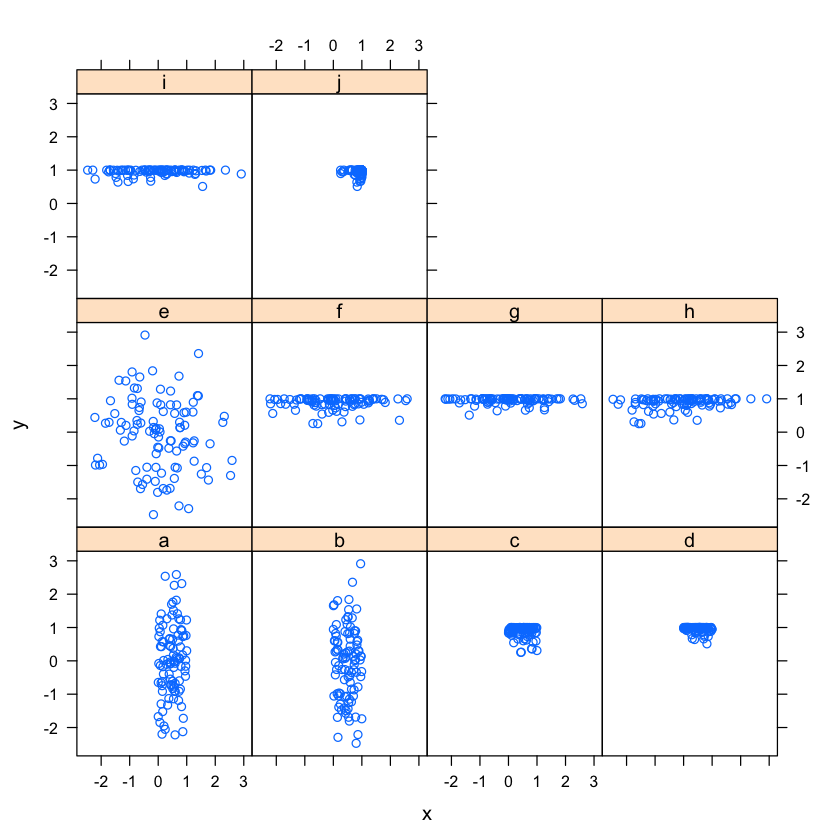

In [3]:
### scattter plot across labels, nothing fancy
xyplot(y ~ x | labels,data=d2)

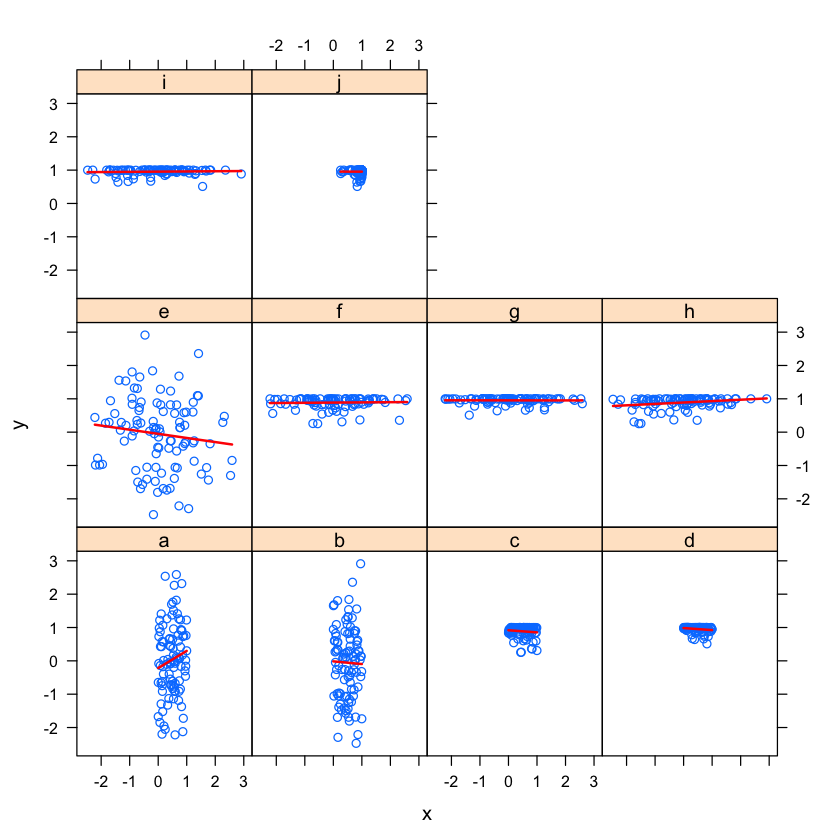

In [4]:
## all axes the same
xyplot(y ~ x | labels, data=d2, 
       panel=function(x,y,...){
           panel.xyplot(x,y,...)
           fit <- lm(y ~ x)
           panel.lines(x,fitted(fit), col.line='red', lwd=2)
       })

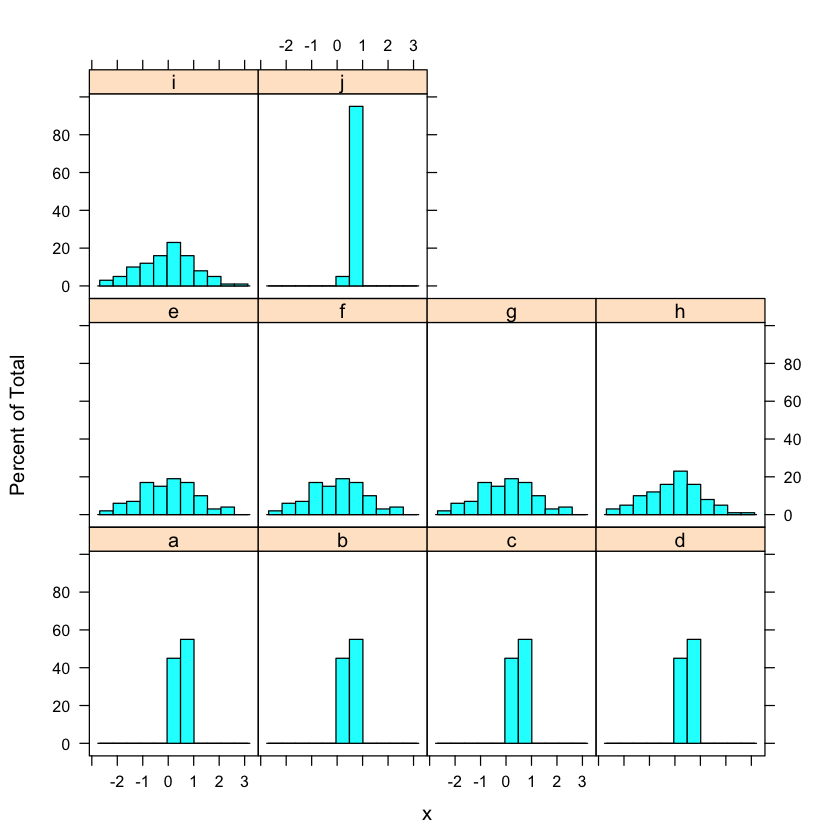

In [5]:
### Histograms
histogram( ~ x | labels, data=d2)